In [45]:
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt

In [48]:
figsize = (1, 1)

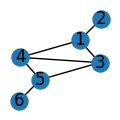

In [60]:
fig = plt.figure(figsize=figsize)
G = nx.Graph([(1, 2), (1, 3), (1, 4), (3, 4), (3, 5), (4, 5), (5, 6)])

nx.draw(G, pos=nx.kamada_kawai_layout(G), node_size=150, with_labels=True)

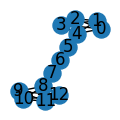

In [71]:
fig = plt.figure(figsize=figsize)
H = nx.barbell_graph(5, 3)

nx.draw(H, pos=nx.kamada_kawai_layout(H), node_size=150, with_labels=True)

## Problem defintion

In graph theory, a dominating set of a graph is a subset of vertices that covers every vertex in the graph, such that every vertex in the graph either belongs to the subset or has at least one neighbor in the subset. Formally, a dominating set $S$ of a graph $G=(V, E)$ is a subset of vertices $S \subseteq V$ such that for every vertex $v \in V$, either $v \in S$ or $v$ has at least one neighbor $u \in S$.

The size of a minimum dominating set is called the domination number of the graph, denoted by $\gamma(G)$. The problem of finding a minimum dominating set is NP-hard, which means that no efficient algorithm is known that can find a minimum dominating set for all possible graphs.

# Greedy heuristic

Source: [Solving the k-dominating set problem on very large-scale networks](https://computationalsocialnetworks.springeropen.com/articles/10.1186/s40649-020-00078-5)

The greedy algorithm for the dominating set problem is a popular heuristic that works by selecting vertices iteratively until all vertices in the graph are either selected or covered by a selected vertex. 

*Note: The greedy algorithm does not guarantee optimal solutions.*

In [129]:
def greedy_heuristic(G, k, seed=None):
    np.random.seed(seed)
    is_covered = {node: False for node in G.nodes()}
    
    dominating_set = set()
    nodes_degrees = list(nx.degree(G))
    nodes_degrees = sorted(nodes_degrees, key=lambda x: x[1], reverse=True)
    sorted_nodes = list(map(lambda x: x[0], nodes_degrees))
    
    for node in sorted_nodes:
        if is_covered[node] == False:
            dominating_set.add(node)
            
            for neighbor_node in nx.ego_graph(G, node, radius=k).nodes():
                is_covered[neighbor_node] = True
                
    return dominating_set

### Examples

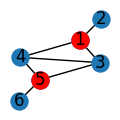

In [130]:
fig = plt.figure(figsize=figsize)

dominating_set = greedy_heuristic(G, 1, seed=42)

nx.draw(G, pos=nx.kamada_kawai_layout(G), node_size=150, with_labels=True)
nx.draw_networkx_nodes(G, pos=nx.kamada_kawai_layout(G), node_size=150, nodelist=dominating_set, node_color='red');

Dominating set = {8, 4, 6}


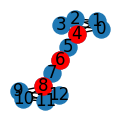

In [133]:
fig = plt.figure(figsize=(1, 1))

dominating_set = greedy_heuristic(H, 1, seed=55)
print(f'Dominating set = {dominating_set}')

nx.draw(H, pos=nx.kamada_kawai_layout(H), node_size=150, with_labels=True)
nx.draw_networkx_nodes(H, pos=nx.kamada_kawai_layout(H), node_size=150, nodelist=dominating_set, node_color='red');

### For larger graphs

#### Pre-processing phase


In [136]:
def remove_isolated_clusters(G, k):
    R = set()

    nodes = list(G.nodes())
    is_isolated = {node: True for node in nodes}
    
    for node in nodes:
        
        if is_isolated[node] == True:
        
            N1 = nx.ego_graph(G, node, radius=k)
            N2 = nx.ego_graph(G, node, radius=k+1)

            if N1.number_of_nodes() == N2.number_of_nodes():
                R = R.union(N1.nodes())

            for neighbor_node in N1.nodes():
                is_isolated[neighbor_node] = False
            
    H = G.copy()
    H.remove_nodes_from(R)
    
    return H

In [201]:
O = nx.karate_club_graph()
O.add_nodes_from([34, 35, 36, 37])
O.add_edges_from([(36, 37)])

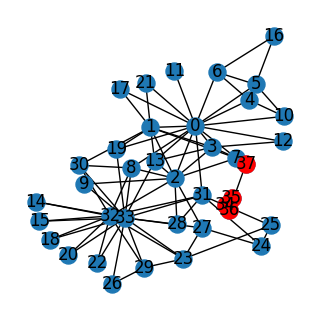

In [206]:
fig = plt.figure(figsize=(3, 3))

nx.draw(O, pos=nx.kamada_kawai_layout(O), node_size=150, with_labels=True)
nx.draw_networkx_nodes(O, pos=nx.kamada_kawai_layout(O), node_size=150, nodelist=set(O.nodes()) - set(nx.karate_club_graph().nodes()) , node_color='red');

# IN PROGRESS